In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')

### Problem Kurma Aşaması

Diyelim ki Starbucks a yeni bir ürün gelicek.Onu Kategorize edecek bir algoritma geliştirmemiz gerekiyor.

In [4]:
df = pd.read_csv("starbucks.csv",index_col=0)
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [7]:
df['item'].nunique()
#Hepsi farklı cinsten ürünler diyebiliriz.

77

In [8]:
df['item'].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [9]:
df['type'].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

* bakery --> fırın içerikli ürünler
* bistro box --> karışık tabaklar
* petite --> küçük  yiyecekler
* hot breakfast --> sıcak servis edilen kahvaltılık ürünler
* salad --> salata
* sandwich --> tost ve sandviç gibi ürünler
* parfait --> genellikle yoğurt ve granola içeren tatlı ürünler.

In [10]:
df.groupby("type")['item'].count()
#Her çeşit üründen ne kadar var?

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

Text(2, 30, 'Ürün Kategori Yelpazesi')

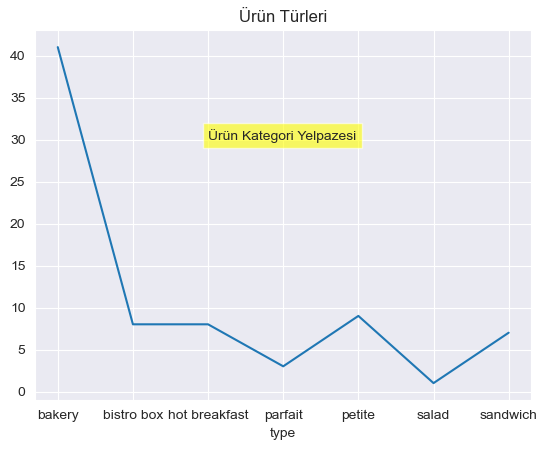

In [11]:
df.groupby("type")['item'].count().plot()
plt.title("Ürün Türleri")
plt.text(2, 30,"Ürün Kategori Yelpazesi",bbox=dict(facecolor="yellow",alpha=0.6)) 
# Grafiğin herhangi bir alanına yazı


<Axes: xlabel='type', ylabel='count'>

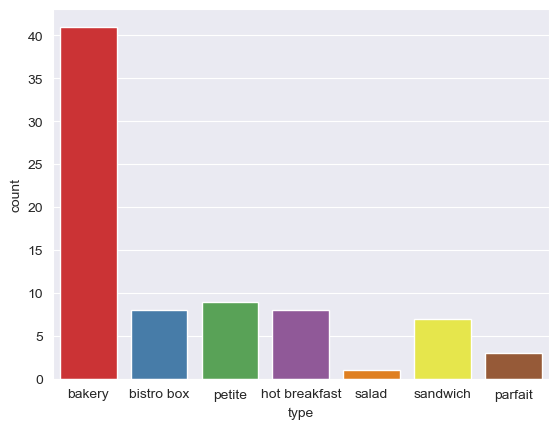

In [12]:
sns.countplot(x="type",data=df,palette='Set1')

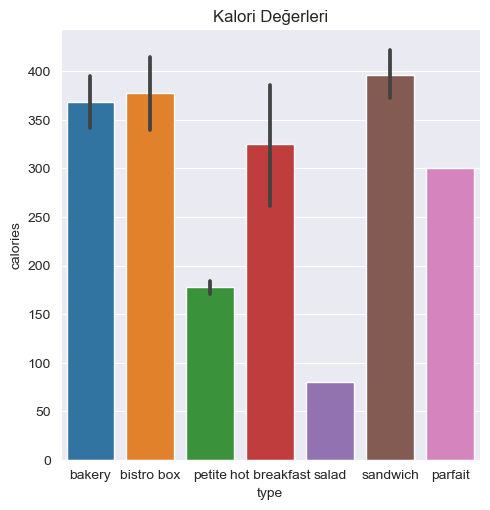

In [13]:
sns.catplot(data=df,kind='bar',x='type',y='calories');
plt.title('Kalori Değerleri');
#Ürün tipine göre kalori grafiği

En düşük kalorili besin tipi salatalar ardından petite geliyor.Diğer kategorilerdeki besinlerin kalorisi 300 ün üstünde olduğu görülüyor

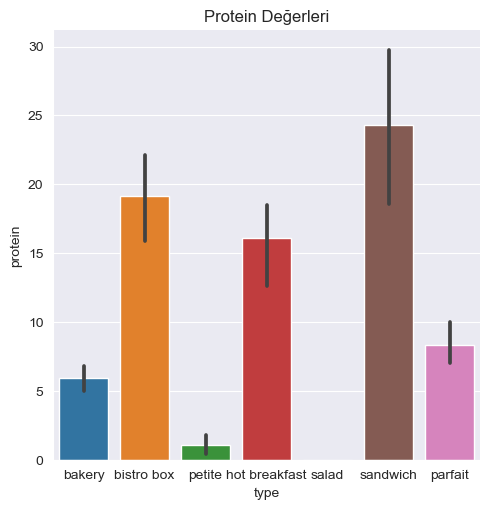

In [14]:
sns.catplot(data=df,kind='bar',x='type',y='protein');
plt.title('Protein Değerleri');
#Ürün tipine göre protein grafiği

En yüksek protein "sandwich" kategorisinde sonradan "bistro box" geliyor.Salatada hiç protein yok
"Petite" ise düşük proteinli diyebiliriz.

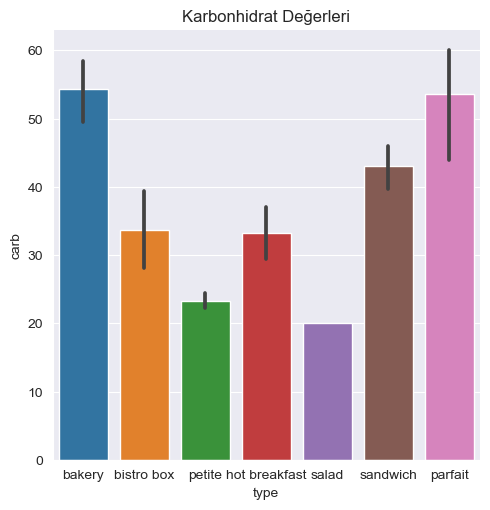

In [15]:
sns.catplot(data=df,kind='bar',x='type',y='carb');
plt.title('Karbonhidrat Değerleri');

En yüksek karbonhidrat değeri "bakery" ve "parfait" kategorisi diyebiliriz.En düşük "salad"

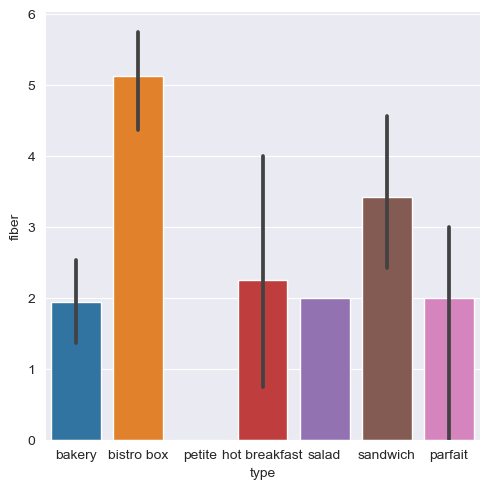

In [17]:
sns.catplot(data=df,x='type',y='fiber',kind='bar')

'petite'  kategorisinde lif yok. En yüksek lif oranı ise "bistro box" kategorisinde.salata sadece bir adet olduğu için standart sapması vs. söz konusu değil.

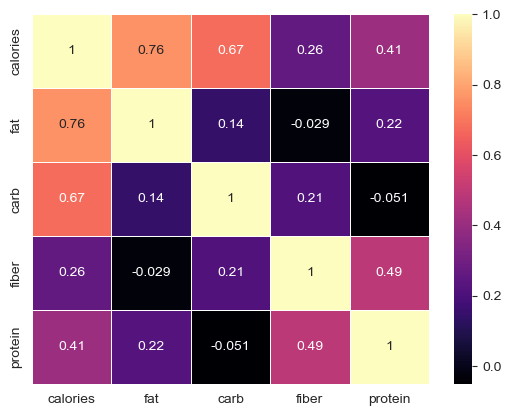

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='magma',linewidths=0.5);

* kalori ile yağ arasında doğrusal yönde pozitif bir ilişki vardır.
* kalori ile karbonhidrat arasında doğrusal yönde pozitif bir ilişki vardır

Aralarındaki ilişkiyi aşağıda daha iyi gözlemlenebilir.

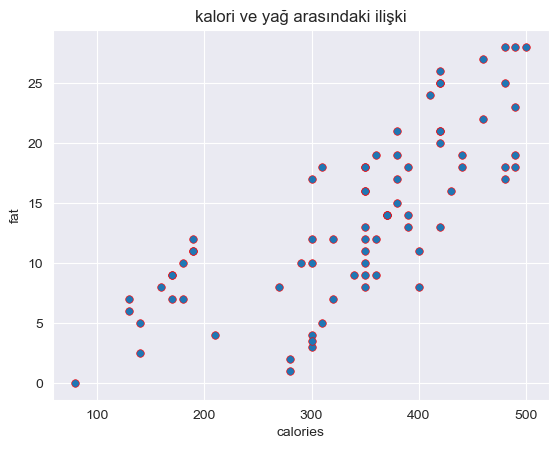

In [52]:
plt.title("kalori ve yağ arasındaki ilişki")
sns.scatterplot(data=df,x="calories",y="fat",s=30,edgecolor="red");

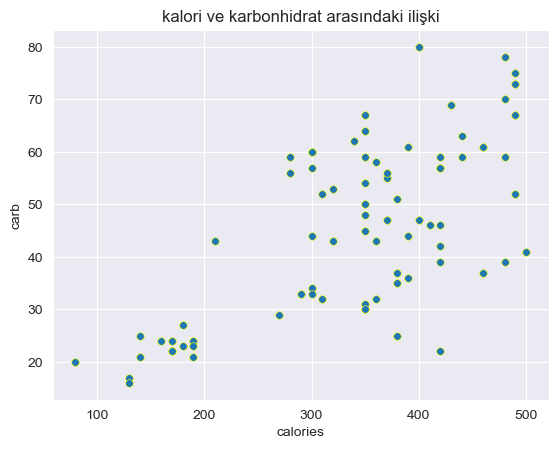

In [64]:
plt.title("kalori ve karbonhidrat arasındaki ilişki")
sns.scatterplot(data=df,x="calories",y="carb",s=30,edgecolor="yellow");

korelasyon matrisinde de gözlemlendiği gibi iki dağılım grafiği pozitif yönde artış var.

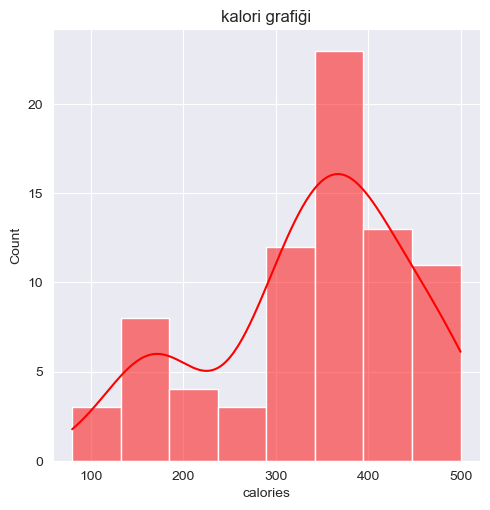

In [60]:
sns.displot(data=df,x='calories',kde=True,color='red')
plt.title("kalori grafiği")
plt.show();

Kalori ortalama olarak 350-400 arasında seyrediyor.Yani Starbucks'dan ne yediğimize bakmazsak ortalama 350-400 arasında bir kalori alırız.

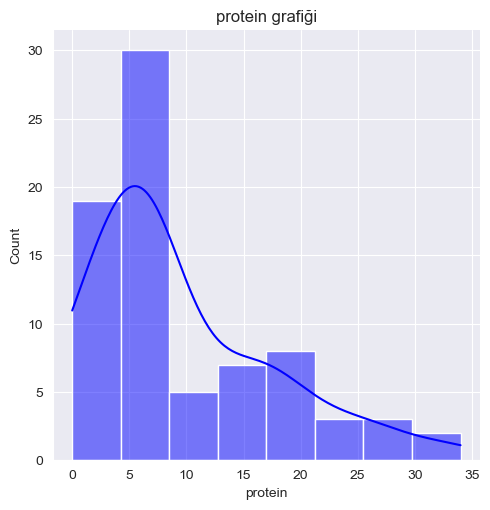

In [68]:
sns.displot(data=df,x='protein',kde=True,color='blue')
plt.title("protein grafiği")
plt.show();

Ürünlerin ortalama 5-10 arası protein değeri olduğunu gözlemliyoruz.Sola doğru basık bir grafik oluşmuş bu yüzden Starbucks yiyecekleri protein yönünden zayıf diyebiliriz.

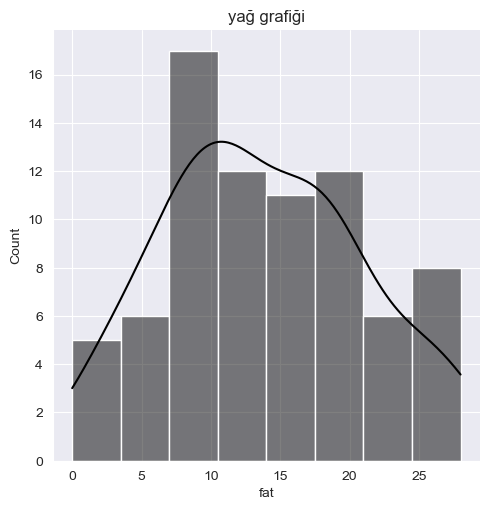

In [76]:
sns.displot(data=df,x='fat',kde=True,color='black')
plt.title("yağ grafiği")
plt.show();

Gıdaların ortalama 10-20 arasında yağ oranı gözüküyor.Starbuck yiyecekleri yağ yönünden zengin diyebiliriz.

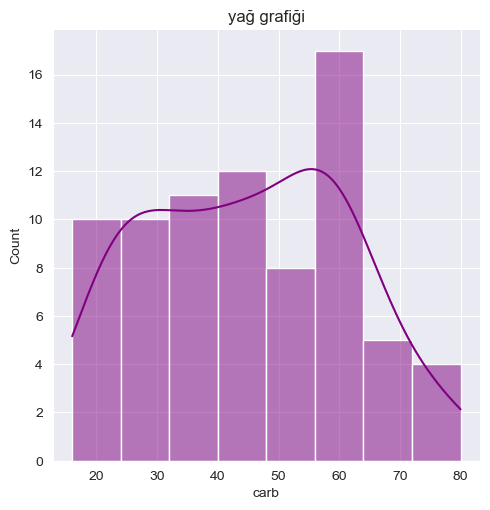

In [79]:
sns.displot(data=df,x='carb',kde=True,color='purple')
plt.title("yağ grafiği")
plt.show();

16-17 farklı ürünün karbonhidrat değeri 60.4 farklı üründe ise 80 değerinde k.hidrat gözlemlenir

### Modelleme

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [81]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [84]:
x = df[['calories','fat','carb','fiber','protein']]
y = df['type']

In [86]:
x.head()

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0


In [88]:
y.head()

1    bakery
2    bakery
3    bakery
4    bakery
5    bakery
Name: type, dtype: object

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=0)

In [96]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
y_pred = model.predict(X_test)
y_pred

array(['bistro box', 'bakery', 'hot breakfast', 'petite', 'bakery',
       'bakery', 'bistro box', 'bakery', 'bistro box', 'hot breakfast',
       'bistro box', 'hot breakfast', 'bakery', 'hot breakfast',
       'hot breakfast', 'bakery'], dtype=object)

In [102]:
accuracy_degeri = accuracy_score(y_test,y_pred)

In [106]:
print("dogruluk degeri: ",accuracy_degeri)

dogruluk degeri:  0.625


### Problem Çözme Aşaması

In [136]:
yeni_urun = pd.DataFrame([[360,3.0,42,4,10]])
yeni_urun
#yeni gelen urunun besin degerlerini sisteme girdikten sonra 
#modelden tahmin etmesini istiyoruz

,0,1,2,3,4
0,360,3.0,42,4,10


In [137]:
tahmin_degeri = model.predict(yeni_urun)
print("yeni ürünün kategorisi: ", tahmin_degeri) 

yeni ürünün kategorisi:  ['parfait']
